# NHS Scotland – A&E Weekly Activity Analysis

This project analyses weekly activity and waiting times in Accident & Emergency (A&E) services across Scotland, using open data published by NHS Scotland.

The objective is to identify patterns in emergency care demand and system performance across hospitals and Health Boards, and to extract actionable insights using Python for data analysis and visualisation.



### Dataset Time Coverage

The dataset covers weekly A&E activity in Scotland from **2015 to 2025**, providing a recent and relevant view of emergency care performance before, during, and after the COVID-19 pandemic.

This timeframe allows for meaningful comparison across periods of systemic disruption and recovery.



## Core Project Insight

**Despite the fact that overall A&E attendance volumes in Scotland have not increased dramatically since the COVID-19 pandemic, system performance has deteriorated significantly.**

The proportion of patients seen within 4 hours has declined, while the percentage of emergency attendances exceeding **8 and 12 hours** has increased. Although these longer delays remain relatively low in absolute terms, their sustained growth represents a clear departure from pre-pandemic standards.

At a regional level, emergency care demand is unevenly distributed. Certain hospitals and Health Boards appear to be consistently under greater pressure, likely reflecting higher population concentration and service centralisation, while other regions experience considerably lower demand.

Given that these trends persist over a **long-term period of nearly a decade**, the findings suggest that factors beyond attendance volume — such as capacity constraints, workforce pressures, or structural inefficiencies — may be driving the observed decline in A&E performance in the post-pandemic period.


## Step 1: Load and Prepare the Dataset

We begin by loading the dataset and converting the date column to datetime format.
This step is crucial for enabling time-based filtering and analysis later in the process.



In [18]:
# This dataset contains weekly A&E activity and waiting times data from NHS Scotland.

# Import necessary library
import pandas as pd

# Load the dataset (make sure the file path is correct for your local machine)
df = pd.read_csv("weekly_ae_activity_20251019.csv")

# Convert date column to datetime format
print("Original date format:", df["WeekEndingDate"].dtype)
df["WeekEndingDate"] = pd.to_datetime(df["WeekEndingDate"].astype(str), format="%Y%m%d")
print("Converted to datetime:", df["WeekEndingDate"].dtype)

# Preview the dataset
print("\nFirst rows of the dataset:")
print(df.head())

Original date format: int64
Converted to datetime: datetime64[ns]

First rows of the dataset:
  WeekEndingDate    Country        HBT TreatmentLocation DepartmentType  \
0     2015-02-22  S92000003  S08000015             A210H         Type 1   
1     2015-02-22  S92000003  S08000015             A210H         Type 1   
2     2015-02-22  S92000003  S08000015             A111H         Type 1   
3     2015-02-22  S92000003  S08000015             A111H         Type 1   
4     2015-02-22  S92000003  S08000016             B120H         Type 1   

  AttendanceCategory  NumberOfAttendancesEpisode  NumberWithin4HoursEpisode  \
0          Unplanned                         814                        624   
1                All                         814                        624   
2          Unplanned                        1347                       1115   
3                All                        1347                       1115   
4          Unplanned                         517            

## Step 2: Filter by Attendance Category

To ensure we're working with consolidated data, we filter the dataset to include only records with `AttendanceCategory` equal to "All".
This avoids duplications caused by subcategories such as 'Unscheduled Care' or 'GP Referrals'.


In [19]:
# Filter dataset to include only 'All' attendance category
df_filtered = df[df["AttendanceCategory"] == "All"].copy()
print(f"Rows after filtering by 'All' category: {df_filtered.shape[0]}")


Rows after filtering by 'All' category: 16739


## Step 3: Explore Treatment Locations

We examine how many unique treatment locations (hospitals or care centres) are present in the filtered dataset.



In [20]:
# Count and list unique treatment locations (hospitals or centres)
num_centres = df_filtered["TreatmentLocation"].nunique()
print(f"Number of unique hospitals or centres: {num_centres}")
print("List of centres:")
print(df_filtered["TreatmentLocation"].unique())


Number of unique hospitals or centres: 32
List of centres:
['A210H' 'A111H' 'B120H' 'Y146H' 'Y144H' 'F704H' 'V217H' 'N101H' 'N411H'
 'N121H' 'G107H' 'C313H' 'C418H' 'G513H' 'G405H' 'G306H' 'G516H' 'H212H'
 'H103H' 'C121H' 'H202H' 'L302H' 'L106H' 'L308H' 'S319H' 'S314H' 'S308H'
 'R103H' 'Z102H' 'T101H' 'T202H' 'W107H']


## Step 4: Explore Health Board Territories (HBT)

The dataset includes a field named `HBT`, representing different Health Board Territories across Scotland.
We count and list them to understand the geographical spread of the data.


In [21]:
# Count and list unique Health Boards (HBT areas)
num_hbt = df_filtered["HBT"].nunique()
print(f"\nNumber of unique Health Boards (HBT): {num_hbt}")
print("HBT codes:")
print(df_filtered["HBT"].unique())



Number of unique Health Boards (HBT): 14
HBT codes:
['S08000015' 'S08000016' 'S08000017' 'S08000029' 'S08000019' 'S08000020'
 'S08000031' 'S08000022' 'S08000032' 'S08000024' 'S08000025' 'S08000026'
 'S08000030' 'S08000028']


### Top 10 Hospitals with the Highest Number of A&E Attendances

To identify the most visited hospitals in terms of A&E attendances, we grouped the filtered dataset by `TreatmentLocation` and summed the values of `NumberOfAttendancesEpisode`. The top 10 locations with the highest total attendance were visualized using a bar chart.

This analysis gives us a quick overview of which hospitals experience the highest patient flow in unscheduled care across Scotland.


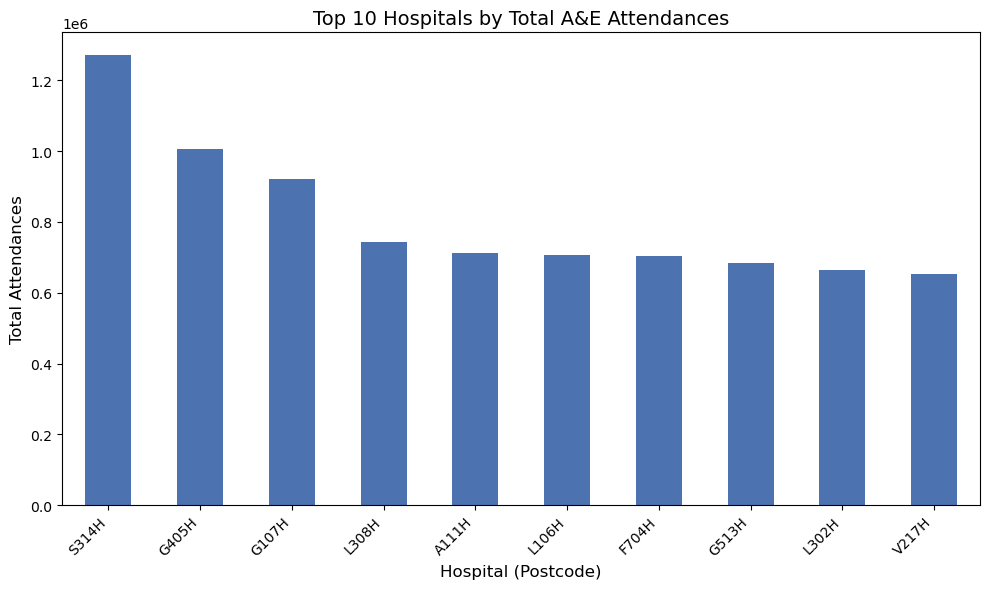

In [22]:
import matplotlib.pyplot as plt

# Group by treatment location and get top 10 by total attendance
top_10_locations = (
    df_filtered.groupby("TreatmentLocation")["NumberOfAttendancesEpisode"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting the top 10 hospitals by attendance
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind="bar", color="#4C72B0")
plt.title("Top 10 Hospitals by Total A&E Attendances", fontsize=14)
plt.xlabel("Hospital (Postcode)", fontsize=12)
plt.ylabel("Total Attendances", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Step 5: Weekly Trends in Total A&E Attendances

Understanding how weekly attendance numbers evolve over time can reveal seasonal patterns, anomalies, or long-term trends. This helps inform resource planning and highlights periods of increased demand in Scotland’s A&E departments.


In [23]:
# Group the data by week and sum the total attendances
weekly_trend = (
    df_filtered.groupby("WeekEndingDate")["NumberOfAttendancesEpisode"]
    .sum()
    .reset_index()
)

# Display the first few rows
weekly_trend.head()


,WeekEndingDate,NumberOfAttendancesEpisode
0,2015-02-22,25513
1,2015-03-01,25401
2,2015-03-08,25151
3,2015-03-15,25238
4,2015-03-22,26247


### Weekly A&E Attendances in Scotland

The following line chart shows how the number of A&E attendances changes week by week. Peaks and drops may indicate seasonal illnesses, public holidays, or external factors such as strikes or severe weather.


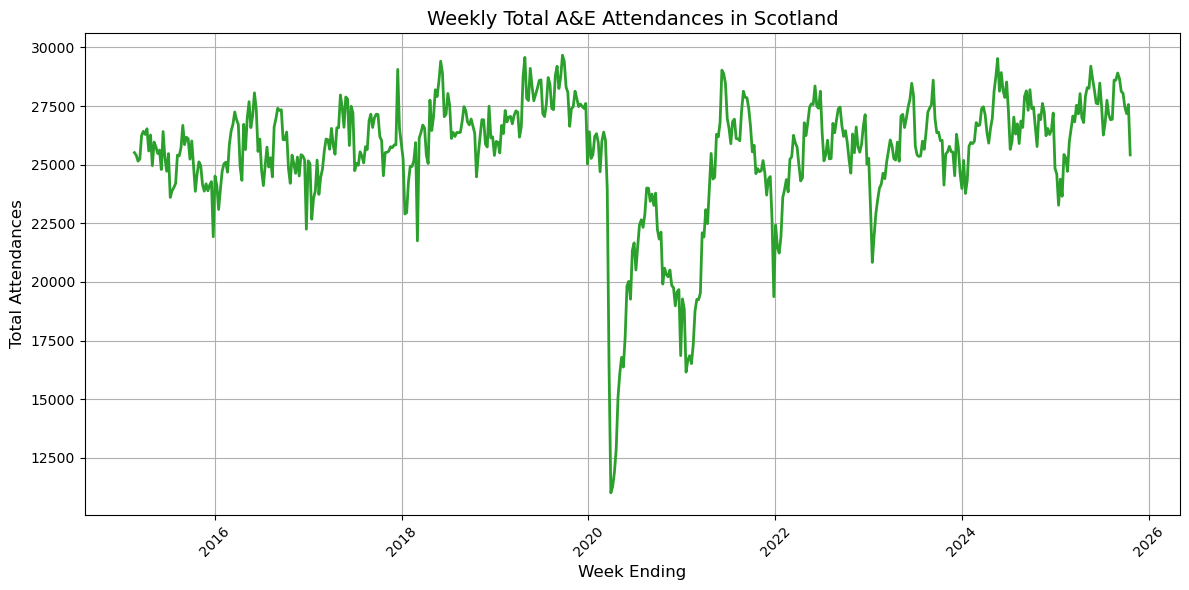

In [24]:
# Plot the weekly trend of A&E attendances
plt.figure(figsize=(12, 6))
plt.plot(weekly_trend["WeekEndingDate"], weekly_trend["NumberOfAttendancesEpisode"], color="#2ca02c", linewidth=2)
plt.title("Weekly Total A&E Attendances in Scotland", fontsize=14)
plt.xlabel("Week Ending", fontsize=12)
plt.ylabel("Total Attendances", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Weekly Attendance Volume Stability

The weekly number of A&E attendances remains relatively stable throughout the observed period, typically ranging between **25,000 and 27,500 attendances per week**.

This limited variation suggests that, despite external shocks such as the COVID-19 pandemic, overall demand for emergency care has not increased dramatically. Therefore, changes in system performance are unlikely to be driven solely by rising attendance volumes.


## Step 6: Weekly Trends and Waiting Times

Understanding how A&E attendances and waiting times fluctuate weekly helps to identify pressure points, assess seasonality, and evaluate the impact of policy or external events like pandemics.


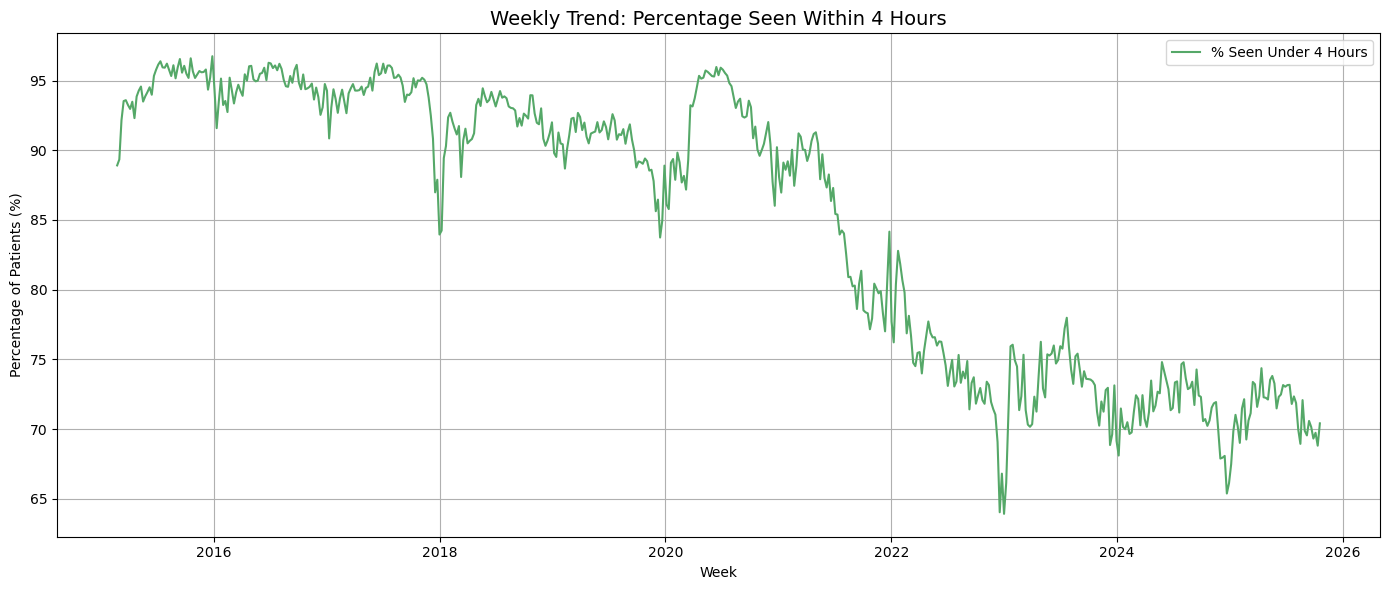

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(
    weekly_combined["WeekEndingDate"],
    weekly_combined["PercentageWithin4HoursEpisode"],
    label="% Seen Under 4 Hours",
    color="#55A868",
)
plt.xlabel("Week")
plt.ylabel("Percentage of Patients (%)")
plt.title("Weekly Trend: Percentage Seen Within 4 Hours", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Step 7: Delays in Emergency Care (>8h and >12h)

To assess the system's efficiency, we analyse the percentage of *Unplanned* A&E attendances (emergencies) where patients waited more than 8 and 12 hours.

This reveals not just the volume of demand, but the **strain on response times**. Delays over 8 and 12 hours are considered critical in emergency care planning.

The chart below displays weekly averages across all hospitals.

*Note: Only rows with `AttendanceCategory = "Unplanned"` were included in this analysis.*


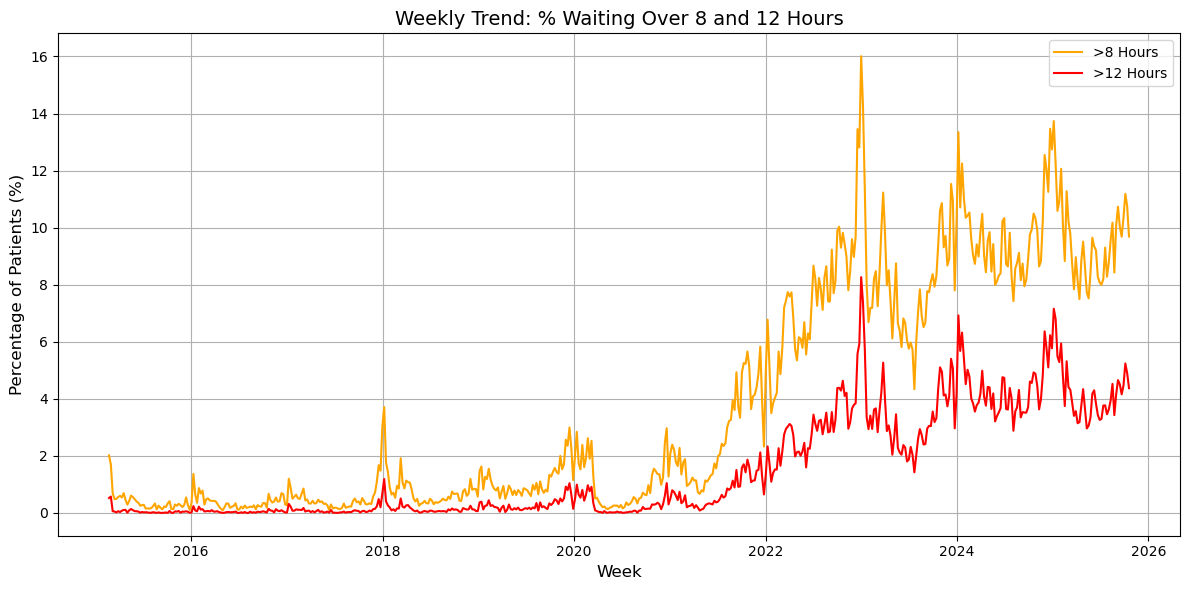

In [26]:
# Filter only UNPLANNED attendances (emergencies)
df_unplanned = df[df["AttendanceCategory"] == "Unplanned"].copy()

# Group by week and calculate the average percentage over 8h and over 12h
weekly_delays = (
    df_unplanned.groupby("WeekEndingDate")[["PercentageOver8HoursEpisode", "PercentageOver12HoursEpisode"]]
    .mean()
    .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_delays["WeekEndingDate"], weekly_delays["PercentageOver8HoursEpisode"], label=">8 Hours", color="orange")
plt.plot(weekly_delays["WeekEndingDate"], weekly_delays["PercentageOver12HoursEpisode"], label=">12 Hours", color="red")
plt.title("Weekly Trend: % Waiting Over 8 and 12 Hours", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Percentage of Patients (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Trend in A&E 4-Hour Performance and Delays Over 8 and 12 Hours

One of NHS Scotland's key performance indicators is the **percentage of emergency (unplanned) patients seen within 4 hours**.

#### Key Insights:

- **Weekly emergency attendance volumes** remained **relatively stable** both pre- and post-pandemic, with a **slight increase after 2020**.  
  This suggests that the **system's reduced efficiency** is not due to a significant rise in demand.
  
- **Pre-pandemic (early 2020)**: The system consistently met or exceeded the **90% target**, with most patients being seen within the 4-hour window.

- **Post-pandemic (mid-2020 onward)**: There was a **clear and sustained decline in 4-hour performance**:
  - In **2021**, the percentage often fell **below 85%**.
  - By **2022–2023**, a new norm emerged: **around 70%** of patients are seen within 4 hours.
  
- **Delays over 8 and 12 hours** have also **increased notably** in the post-pandemic period.
  - A significant **spike in long waits** is visible during 2021.
  - While the absolute percentages of such delays remain **relatively low**, they represent a **marked deterioration** from pre-pandemic levels.

> These findings suggest that **factors beyond patient volume**, such as staff shortages, service disruptions, or operational challenges, may be impacting the system’s ability to respond quickly to emergencies.

These patterns highlight growing delays despite stable demand, calling for deeper investigation into health board-level capacity, staffing, and systemic responses.



-> In the next section, we will explore **Health Board-specific trends** to identify regional disparities in performance.



## Step 8: Health Board-Specific Trends

Health Boards (HBTs) represent administrative healthcare regions within NHS Scotland. 
Analysing A&E activity and performance at this level allows us to identify **regional disparities** in demand and system efficiency, beyond individual hospitals.


### Emergency Attendance Volume by Health Board

We begin by analysing the total number of *unplanned (emergency)* A&E attendances across Health Boards. 
This helps identify which regions experience the highest pressure in emergency care services.


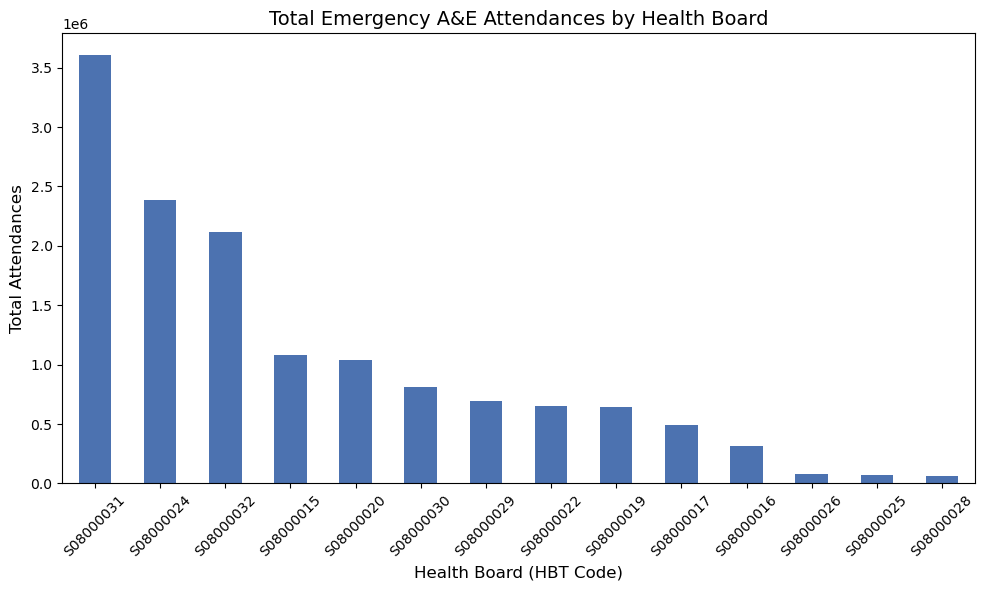

In [27]:
# Filter only unplanned (emergency) attendances
df_unplanned = df[df["AttendanceCategory"] == "Unplanned"].copy()

# Aggregate total emergency attendances by Health Board
hbt_attendance = (
    df_unplanned.groupby("HBT")["NumberOfAttendancesEpisode"]
    .sum()
    .sort_values(ascending=False)
)

# Plot total emergency attendances by Health Board
plt.figure(figsize=(10, 6))
hbt_attendance.plot(kind="bar", color="#4C72B0")
plt.title("Total Emergency A&E Attendances by Health Board", fontsize=14)
plt.xlabel("Health Board (HBT Code)", fontsize=12)
plt.ylabel("Total Attendances", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Long Waiting Times (>8h and >12h) by Health Board

To assess severe system strain, we analyse the average percentage of emergency patients waiting more than 8 and 12 hours across Health Boards.
These delays are considered critical indicators of service overload.


<Figure size 1000x600 with 0 Axes>

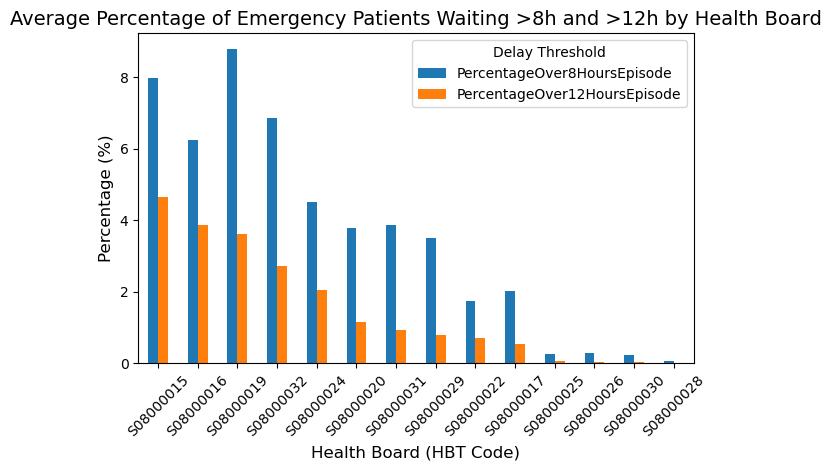

In [28]:
# Average long waits by Health Board
hbt_long_waits = (
    df_unplanned.groupby("HBT")[["PercentageOver8HoursEpisode", "PercentageOver12HoursEpisode"]]
    .mean()
    .sort_values(by="PercentageOver12HoursEpisode", ascending=False)
)

# Plot delays >8h and >12h
plt.figure(figsize=(10, 6))
hbt_long_waits.plot(kind="bar")
plt.title("Average Percentage of Emergency Patients Waiting >8h and >12h by Health Board", fontsize=14)
plt.xlabel("Health Board (HBT Code)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Delay Threshold")
plt.tight_layout()
plt.show()


#### Regional Performance Insights

This Health Board-level analysis reveals notable regional disparities in emergency care performance.

Some Health Boards manage to maintain relatively strong 4-hour performance despite high demand, while others experience both elevated attendance volumes and prolonged waiting times.
The presence of higher >8h and >12h delays in specific regions suggests structural or capacity-related challenges rather than purely demand-driven pressure.

These findings highlight the importance of region-specific strategies when addressing A&E system performance across Scotland.


## Step 9: Attendance Distribution by Health Board (HBT)

Health Boards (HBTs) represent administrative areas within NHS Scotland. Analyzing A&E attendance by HBT helps identify regional disparities in demand and supports resource allocation and planning at a strategic level.


In [29]:
# Group by HBT and sum the total number of attendances
attendances_by_hbt = (
    df_filtered.groupby("HBT")["NumberOfAttendancesEpisode"]
    .sum()
    .sort_values(ascending=False)
)

# Display results
attendances_by_hbt.head()


HBT
S08000031    3615044
S08000024    2413902
S08000032    2114832
S08000015    1100311
S08000020    1044005
Name: NumberOfAttendancesEpisode, dtype: int64

### Total A&E Attendances by Health Board

The following bar chart highlights which Health Boards handled the highest volume of A&E patients during the period covered by the dataset.


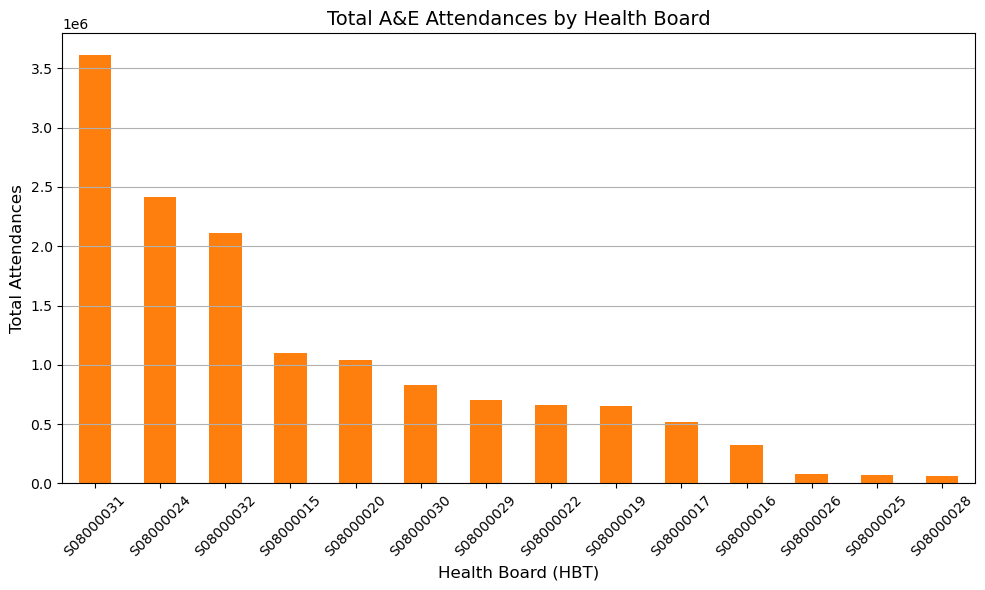

In [30]:
# Plot the total attendances by HBT
plt.figure(figsize=(10, 6))
attendances_by_hbt.plot(kind="bar", color="#ff7f0e")
plt.title("Total A&E Attendances by Health Board", fontsize=14)
plt.xlabel("Health Board (HBT)", fontsize=12)
plt.ylabel("Total Attendances", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis="y")
plt.show()


#### Preliminary Insights from the Data

After generating the visualizations, we can draw some initial conclusions:

- **The hospital with the highest A&E attendance** is the **Royal Infirmary of Edinburgh**, followed closely by **Glasgow Royal Infirmary** and the **Queen Elizabeth University Hospital in Glasgow**.
- **Mid-2020 shows a sharp drop in attendance**, likely due to the impact of the COVID-19 pandemic, which significantly affected non-urgent hospital visits.
- During 2022, there is a noticeable decline in attendances, indicating a potential change in healthcare service utilization post-pandemic.
- From the administrative regions perspective, **Glasgow Health Board (HBT)** shows the **highest number of emergency attendances**, exceeding 3.5 million episodes, followed by other boards below the 2.5 million mark.

These patterns provide important context for understanding both hospital-specific and region-specific demand for emergency services.

-> Next, we will explore **weekly trends and waiting times** to assess efficiency and potential pressure points in the A&E system.


## Final Conclusions

- Overall A&E attendance volumes in Scotland have remained relatively stable over time, indicating that increased demand alone does not explain the decline in system performance.
- Since the COVID-19 pandemic, the percentage of patients seen within the 4-hour target has decreased substantially, while long waiting times (>8h and >12h) have become more frequent.
- The rise in prolonged waits suggests increasing strain on emergency care services, even though extreme delays remain a minority of cases.
- Significant regional disparities exist across Health Boards, with certain areas consistently experiencing higher pressure than others.
- These findings point towards structural and operational challenges (such as capacity, staffing, or resource allocation) as key drivers of post-pandemic performance deterioration.
